<a href="https://colab.research.google.com/github/bugatha1/Tensorflow/blob/main/Tensorflow_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [3]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [10]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [11]:
X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

In [23]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
  tf.keras.layers.Dense(1, name='output_layer')                             
])

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [25]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Total params : total number of parameters in the model.<br>
Trainable params: these are the parameters (patterns) the model can update as it trains.<br>
Non-Trainalbe params : these are the parameters aren't updated during training (this is typically when you bring in already learn patterns or parameters from other models during **transfer learning** <br>


In [ ]:
model.fit(X_train, y_train, epochs=100, verbose=1)

In [27]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


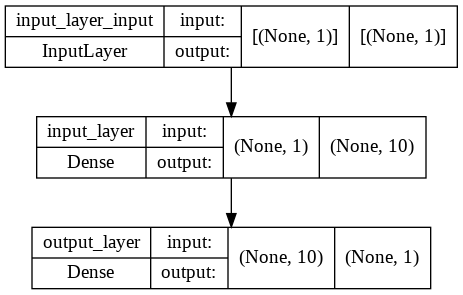

In [28]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes=True)

In [29]:
y_pred = model.predict(X_test)
y_pred

array([[59.745083],
       [63.61937 ],
       [67.49365 ],
       [71.36794 ],
       [75.242226],
       [79.11652 ],
       [82.99081 ],
       [86.86509 ],
       [90.73938 ],
       [94.61367 ]], dtype=float32)

In [30]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [42]:
import matplotlib.pyplot as plt

def plot_predictions(train_data=X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c='r', label='training data')
  plt.scatter(test_data, test_labels, c='b', label='testing data')
  plt.scatter(test_data, predictions, c='g', label='predicton data')
  plt.legend();


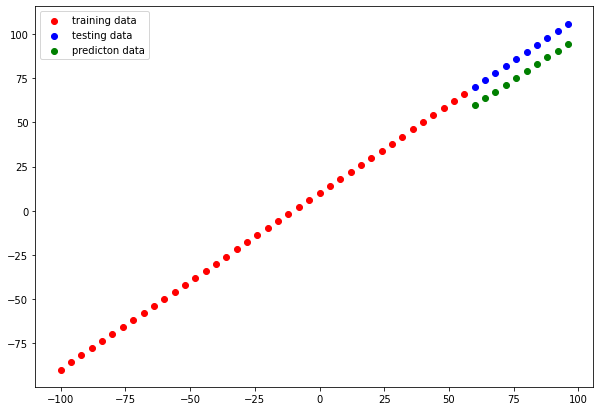

In [43]:
plot_predictions()